##### Introduction to Scikit-learn


###### Scikit-learn is an open-source Python library that provides simple and efficient tools for data mining and data analysis. It is built on NumPy, SciPy, and matplotlib, and is widely used for implementing machine learning algorithms such as classification, regression, clustering, and dimensionality reduction.

###### Scikit-learn is popular because it is easy to use, well-documented, and provides a wide range of efficient tools for machine learning and statistical modeling. It integrates well with other scientific libraries like NumPy and pandas, making it a go-to choice for data scientists and researchers.

###### Scikit-learn integrates seamlessly with NumPy for numerical operations, pandas for data manipulation, and matplotlib for data visualization. This allows users to preprocess data with pandas, perform computations with NumPy, and visualize results with matplotlib, all while leveraging scikit-learn's machine learning capabilities.

##### Basic Features of Scikit-learn

In [1]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris(as_frame=True)
iris_df = iris.frame

# Display the first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize the feature columns (excluding 'target')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_df.drop('target', axis=1))

# One-hot encode the target column
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(iris_df[['target']])

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Use the original target column for y
y = iris_df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Supervised Learning

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load iris dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print("Confusion Matrix:\n", cm)

Accuracy: 1.00
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


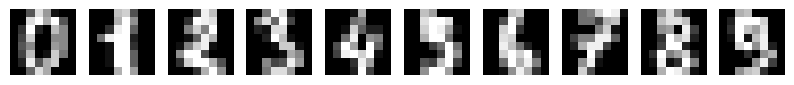

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



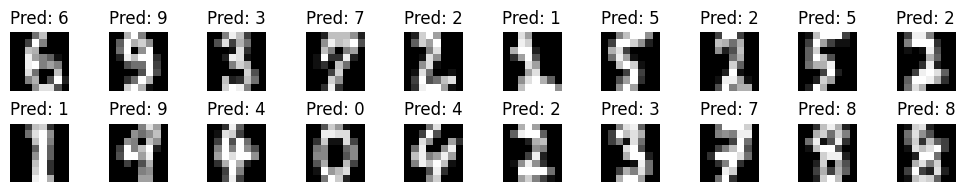

In [6]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

# Load digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Visualize some digits
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.axis('off')
plt.show()

# Train/test split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

# Train SVC
svc = SVC(gamma=0.001)
svc.fit(X_train_d, y_train_d)

# Predict and evaluate
y_pred_d = svc.predict(X_test_d)
print(classification_report(y_test_d, y_pred_d))

# Visualize predictions
fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test_d[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_pred_d[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

##### Unsupervised Learning 

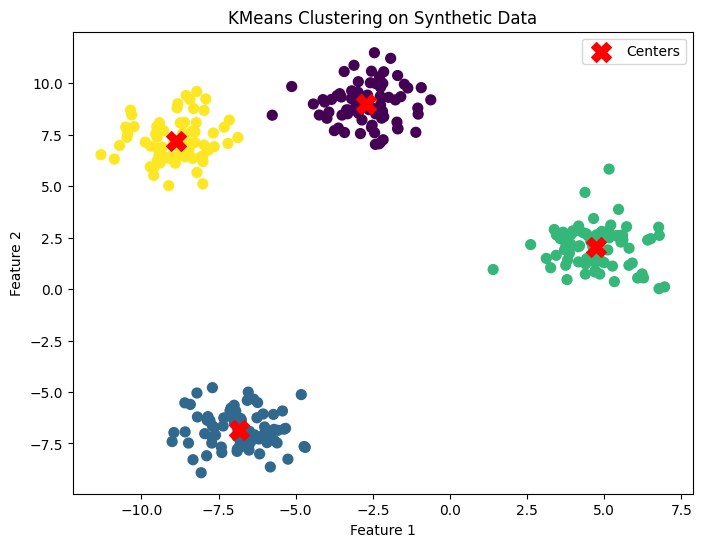

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Generate synthetic data
X_blob, y_blob = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_blob)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centers')
plt.title("KMeans Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [8]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

# Fit Gaussian Mixture Model on the scaled iris features
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Compare GMM clusters with actual labels
ari = adjusted_rand_score(iris_df['target'], gmm_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.52


##### Model Selection & Evaluation 

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Example: train_test_split (already used above, but shown here for reference)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: cross_val_score with LogisticRegression
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.2f}")

# Example: Grid Search with GridSearchCV for LogisticRegression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validated accuracy: {grid.best_score_:.2f}")

# Metrics on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Test Precision: {precision:.2f}")
print(f"Test Recall: {recall:.2f}")
print(f"Test F1 Score: {f1:.2f}")

# ROC AUC (only meaningful for binary or one-vs-rest multiclass)
if len(set(y_test)) == 2:
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"Test ROC AUC: {roc_auc:.2f}")

Cross-validated accuracy scores: [1.         1.         0.875      1.         0.95833333]
Mean CV accuracy: 0.97
Best parameters: {'C': 1}
Best cross-validated accuracy: 0.97
Test Accuracy: 1.00
Test Precision: 1.00
Test Recall: 1.00
Test F1 Score: 1.00


##### Visualization Techniques

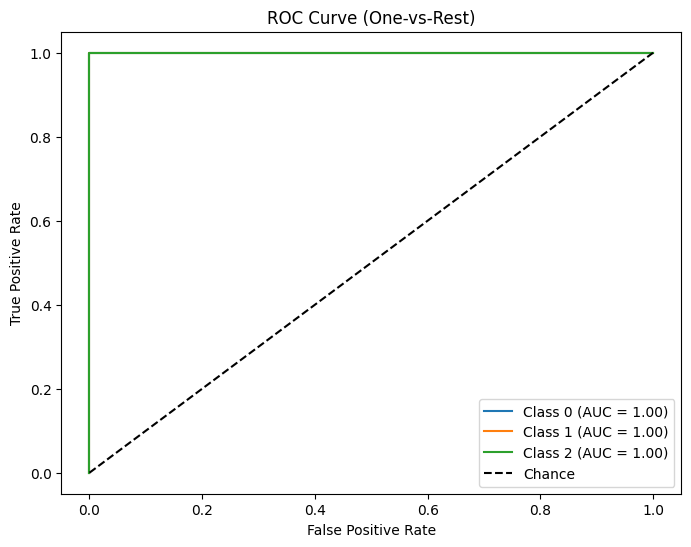

In [11]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

if hasattr(model, "predict_proba"):
    y_score = model.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (One-vs-Rest)")
    plt.legend()
    plt.show()

##### Practice Project (Multiclass Classification)


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/ayushv322/animal-classification/versions/1
Dataset not found. Using a synthetic dataset for demonstration.
Confusion Matrix:
 [[32  3  3]
 [ 0 28  0]
 [ 3  5 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.78      1.00      0.88        28
           2       0.90      0.76      0.83        34

    accuracy                           0.86       100
   macro avg       0.86      0.87      0.86       100
weighted avg       0.87      0.86      0.86       100



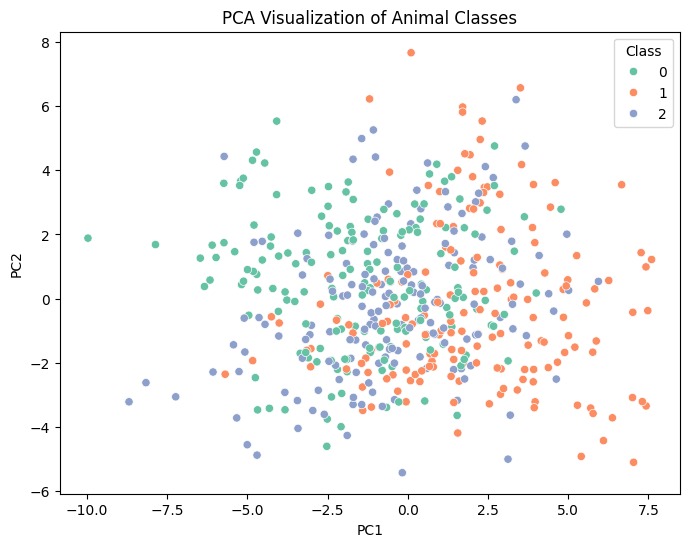

In [15]:
%pip install kagglehub

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

import kagglehub

# Download latest version
path = kagglehub.dataset_download("ayushv322/animal-classification")

print("Path to dataset files:", path)
# Load dataset
import os
csv_path = os.path.join(path, 'animal_classification.csv')

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    # Clean dataset (example: drop missing values)
    df = df.dropna()
else:
    print("Dataset not found. Using a synthetic dataset for demonstration.")
    from sklearn.datasets import make_classification
    X_syn, y_syn = make_classification(n_samples=500, n_features=8, n_informative=5, n_classes=3, random_state=42)
    df = pd.DataFrame(X_syn, columns=[f"feature_{i}" for i in range(8)])
    df['target'] = y_syn

# Feature engineering (example: encode categorical columns)
for col in df.select_dtypes(include='object').columns:
    if col != 'target':
        df[col] = df[col].astype('category').cat.codes

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.title('PCA Visualization of Animal Classes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Class')
plt.show()